## Self-consistent spectral unfolding

    by M.Süzen
    (c) 2025

Prerequisite to this tutorial is finishing the `wigner_semicircle.ipynb` and   
`wigner_dyson_spacing.ipynb` lectures first as a background. 

Spectral unfolding appears in quantum mechanical description of atomic systems  
from random matrix theory perspective. The core idea is to remove local fluctuations  
in the analysis of the spectra, and obtain a new `unfolded spectra`.   

In this lecture notes we will understand. 

* What does unfolding entails. 
* A robust way of doing this in detail. This is something  
  called `self-consistent spectral unfolding`
* How to just use `leymosun`'s tools to unfold a spectra:  
  We will use `leymosun`

## Needed components 

Load all tools from `leymosun` that we would use

In [7]:
from leymosun.spectral import unfold_spectra, empirical_spectral_density, nnsd
from leymosun.gaussian import goe 
import numpy as np
import matplotlib.pyplot as plt
import leymosun 
leymosun.__version__

'0.2.42'

## Definition of spectral unfolding statistically  

The idea of unfolding is removing the fluctuations in spectra locally.  
Here, locally means in the vicinity of any given eigenvalues (singular values).  
 This can be measured by nearest-neighbor spacing values $\Delta e_{i}$, fluctuations.   
 Then the mean fluctuation  over $N$ sorted eigenvalues   
 $\Delta e_{i} = |e_{i}-e_{i-1}|$ should be close to $1.0$ 

If we `transformed` the empirical density $\rho(e)$, via an `unfolding` procedure,  
that yields this mean value, $\frac{1}{N} \sum_{i=1}^{N} \Delta e_{i} \rightarrow 1.0$.   
It is important that it isn't smoothen as in smoothing the data, it is thought as of   
unfolding a rough paper or transformation or mapping, $P(x)$.   $P(x)$ here is simply   
ranked of the sorted eigenvalues and similar to the concept of   
{\it density of states} in the `unfolded` `raw` case.


## Polynomial Unfolding: Self-consistent approach 

The approach starts with fitting a $n$ degree polynomial,   
$P(e) =  \sum_{k=0}^{k=n} a_{k} e^{k}$ to eigenvalues $e_{i}$.   
Then, we check which degree leads mean fluctuation of $1.0$.    
Essentially, we fit different degree polynomials on  $(y, e_{i})$,   
where by $y$ is the rank order. This is what implemented in  
`leymosun`'s `unfold_spectra` functionality.  

## Example: Raw and Unfolded spectrum

In this example we will generate spectra from GOE and plot  
$(y, e_{i})$, where $e_{i}$. Let's just use ensemble of size 1.   
We choose a smaller matrix to see how unfolded eigenvalues looks   
close up as stair function. We compute eigenvalues and plot the 
sorted eigenvalues.    

In [8]:
A = goe(50)
eigenvalues, _, _ = empirical_spectral_density([A])
eigenvalues = sorted(eigenvalues[0]) # as this was ensemble and raw sort them
y= np.arange(1,len(eigenvalues))

Text(0, 0.5, 'Density of States')

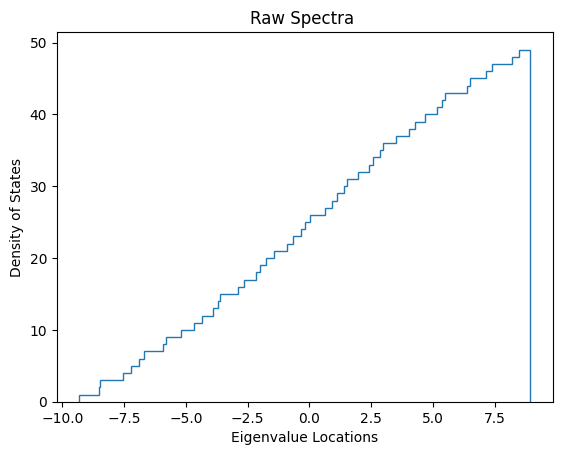

In [9]:
plt.stairs(y, eigenvalues)
plt.title("Raw Spectra ")
plt.xlabel("Eigenvalue Locations")
plt.ylabel("Density of States")


Let's compute the `mean fluctuations`, which must be far from 1.0. 

In [10]:
np.mean(np.diff(eigenvalues))

np.float64(0.37241809372654416)

Let's now unfold the spectrum with a polynomial self-consistent approach,    
here we use only up to a degree $10$ and do not remove outliers as this is a too small matrix    
for demonstration purposes. Then we see that `mean fluctuations` are close to $1.0$

In [11]:
unfolded_spec, _, _ = unfold_spectra(eigenvalues=eigenvalues, iqr=False, deg_max=20)
np.mean(np.diff(unfolded_spec)) # ~1.0

np.float64(1.0000263675535441)

Let's now compare local fluctuations over density of states.

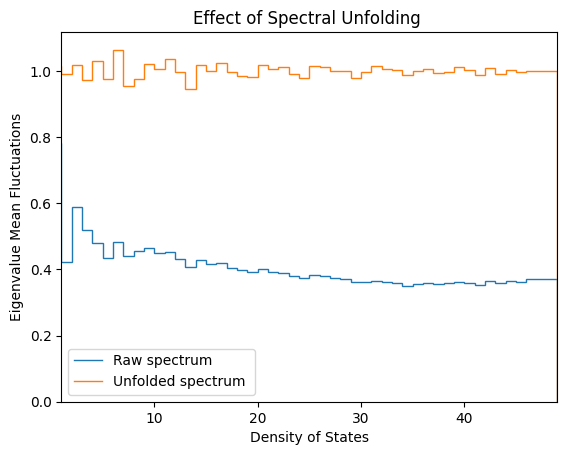

In [ ]:
plt.stairs(np.cumsum(np.diff(eigenvalues))/y, label= "Raw spectrum")
plt.stairs(np.cumsum(np.diff(unfolded_spec))/y, label="Unfolded spectrum ")
plt.title("Effect of Spectral Unfolding ")
plt.ylabel("Eigenvalue Mean Fluctuations")
plt.xlabel("Density of States")
plt.xlim([1,49])
plt.legend()

**Exercise** Repeat the analysis for larger ensemble, $M=50$ and $N=500$. Plot with uncertainty quantification. Use `leymosun`'s `bootstrap_observed_matrix_ci` utility.

<Figure size 640x480 with 0 Axes>